In [65]:
import gymnasium as gym
import os
import numpy as np
import sys
sys.path.append(r"C:\Users\Manan\OneDrive\Documents\orbit_project")

import orbit_optimization_project
from orbit_optimization_project.orbit_env.orbit_env import OrbitEnv

from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.logger import configure
from stable_baselines3.common.vec_env import DummyVecEnv

from orbit_optimization_project.orbit_env.orbit_env import OrbitEnv



# Change working directory

In [55]:
#os.chdir(r"C:\Users\Manan\OneDrive\Documents\orbit_project\orbit_optimization_project")

In [ ]:
os.getcwd()

# Creating Environment

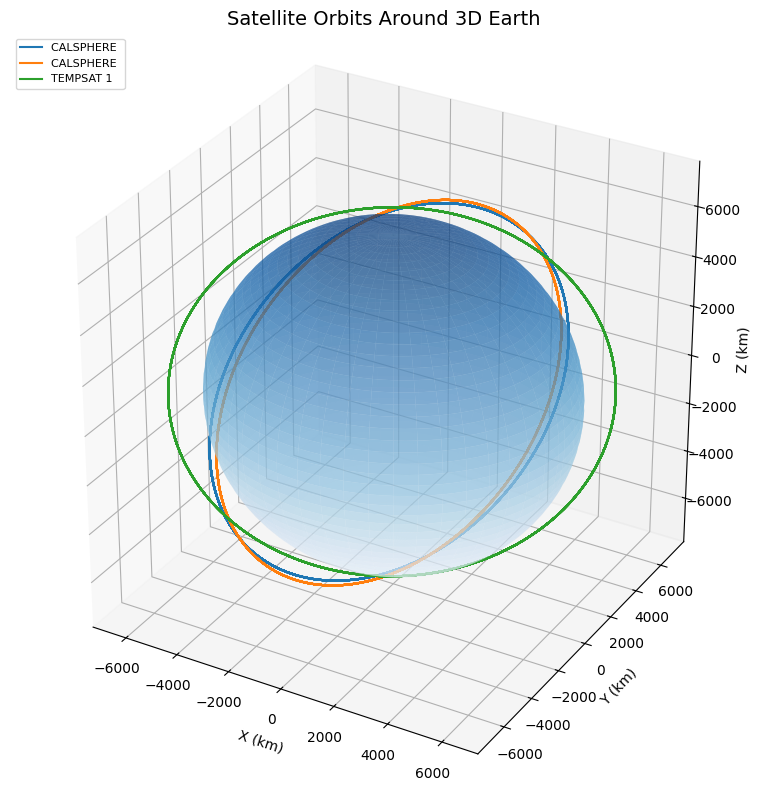

Plotted 7358 satellites within altitude range (700.0, 1550.0)



In [67]:
env = gym.make("OrbitEnv-v0")

In [69]:
env.action_space.sample()

array([7.6506963e+03, 4.2355970e-02, 1.9975011e+00, 5.8510580e+00,
       5.3890362e+00], dtype=float32)

# Creating vector environment 

In [71]:
vec_env = DummyVecEnv([lambda: env])

In [73]:
vec_env.action_space.sample()

array([7.1787881e+03, 8.8444963e-02, 1.6229743e+00, 8.8951027e-01,
       8.2139260e-01], dtype=float32)

# Creating logs and evaluation env

Logging to ./logs/


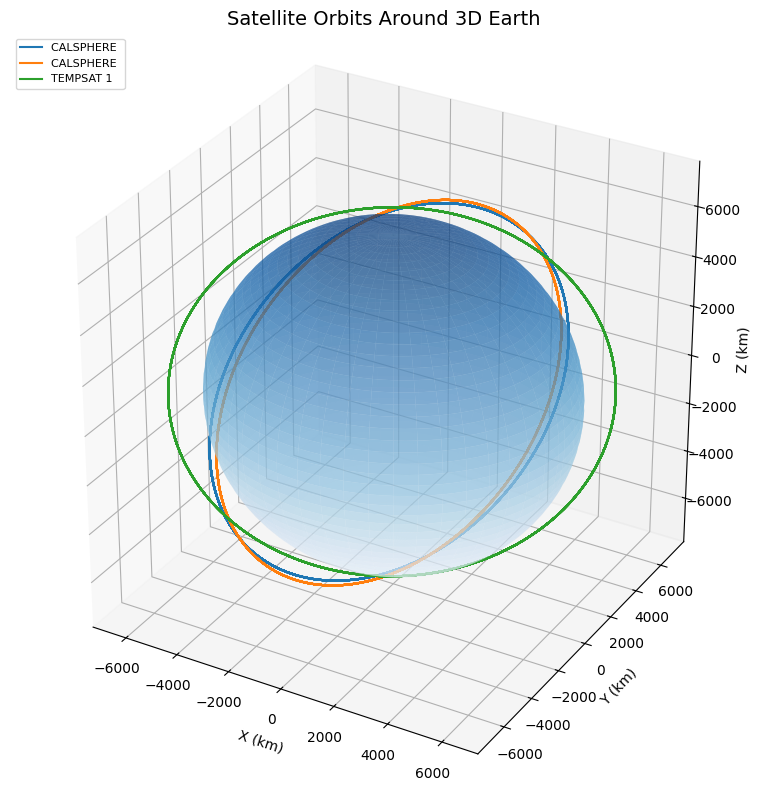

Plotted 7358 satellites within altitude range (700.0, 1550.0)



In [75]:
log_dir = "./logs/"
os.makedirs(log_dir, exist_ok=True)

# Configuring logger to output logs to console and files
new_logger = configure(log_dir, ["stdout", "csv", "tensorboard"]) 

# Creating a separate evaluation environment
eval_env = gym.make('OrbitEnv-v0')
 
eval_callback = EvalCallback(
    eval_env,
    best_model_save_path=os.path.join(log_dir, "best_model"),
    log_path=log_dir,
    eval_freq=1000,
    deterministic=True,
    render=False,
)

In [77]:
eval_env.action_space.sample()

array([7.2684541e+03, 4.8935037e-02, 1.4532833e+00, 4.6928902e+00,
       5.8611002e+00], dtype=float32)

# Define the Model policy, algorithm and other parameters

In [79]:
model = PPO(
    "MultiInputPolicy",
    vec_env,
    verbose=1,
    tensorboard_log=log_dir,
)

model.set_logger(new_logger)


Using cuda device


In [81]:
env.observation_space.sample()

{'Coverage_error': 0,
 'Ground_target_valid': 0,
 'orbital_elements': array([7.3581455e+03, 6.9067962e-03, 3.0936763e+00, 4.4990416e+00,
        1.4708010e+00], dtype=float32),
 'safety_buffer_distance': 0}

# Start training 

In [83]:
model.learn(total_timesteps=50000, callback=eval_callback)

C:\Users\Manan\anaconda3\Lib\site-packages\gymnasium\utils\passive_env_checker.py:126: UserWarning: WARN: The obs returned by the `reset()` method should be an int or np.int64, actual type: <class 'numpy.bool_'>
  logger.warn(f"{pre} should be an int or np.int64, actual type: {type(obs)}")
C:\Users\Manan\anaconda3\Lib\site-packages\gymnasium\utils\passive_env_checker.py:158: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
C:\Users\Manan\anaconda3\Lib\site-packages\gymnasium\utils\passive_env_checker.py:126: UserWarning: WARN: The obs returned by the `reset()` method should be an int or np.int64, actual type: <class 'tuple'>
  logger.warn(f"{pre} should be an int or np.int64, actual type: {type(obs)}")


ValueError: setting an array element with a sequence.

In [99]:
obs = env.reset()

In [104]:
obs

({'orbital_elements': array([7.8449346e+03, 8.8167405e-03, 1.2771089e+00, 5.3252187e+00,
         8.1698692e-01], dtype=float32),
  'Ground_target_valid': 0,
  'Coverage_error': True,
  'safety_buffer_distance': (6523.172477831194, True)},
 {})